In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulacion de los datos

Carga, limpieza y formateo

In [102]:
# Formateo de los datos
df_data_ventas=pd.read_csv("Test_task_data.csv").convert_dtypes()
# Formateo de las fechas
df_data_ventas.Date=pd.to_datetime(df_data_ventas.Date)
# Formateo de las horas, solo mostrar horar
df_data_ventas.Time=pd.to_datetime(df_data_ventas.Time, format="%H:%M").dt.hour
# dias de la semana y mes
df_data_ventas["day_name"]=df_data_ventas.Date.dt.day_name()
df_data_ventas["day_of_week"]=df_data_ventas.Date.dt.day_of_week
df_data_ventas["month"]=df_data_ventas.Date.dt.month
df_data_ventas["days_before"] = df_data_ventas['Date'].diff().dt.days

df_data_ventas=df_data_ventas.sort_values(["Date","day_of_week",])

Las marcas y las ciudades son datos categoricos 100% relacionadas, por lo que se opto por retirar las marcas.

El Invoce ID es un dato innecesario.

In [103]:
df_data_ventas.drop(['Invoice ID', 'Branch',],axis=1,inplace=True)
df_data_ventas["Operations"]=1
df_data_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 17 to 963
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City                     1000 non-null   string        
 1   Customer type            1000 non-null   string        
 2   Gender                   1000 non-null   string        
 3   Product line             1000 non-null   string        
 4   Unit price               1000 non-null   Float64       
 5   Quantity                 1000 non-null   Int64         
 6   Tax 5%                   1000 non-null   Float64       
 7   Total                    1000 non-null   Float64       
 8   Date                     1000 non-null   datetime64[ns]
 9   Time                     1000 non-null   int64         
 10  Payment                  1000 non-null   string        
 11  cogs                     1000 non-null   Float64       
 12  gross margin percentage  1000 non-

In [32]:
def get_data_about(df, num_of_column):
    """
        Optiene datos de interes de una columna.
    """

    column = df.columns[num_of_column]
    print(column, end="\n\n")
    print("stadistics")
    print(df[column].describe(),end="\n\n")
    print("Frecuency")
    print(df[column].value_counts(),end="\n\n")
    print("Proportion")
    print(df[column].value_counts(normalize=True),end="\n\n")



In [33]:
get_data_about(df_data_ventas,7)

Total

stadistics
count        1000.0
mean     322.966749
std      245.885335
min         10.6785
25%      124.422375
50%         253.848
75%       471.35025
max         1042.65
Name: Total, dtype: Float64

Frecuency
216.846    2
93.744     2
263.97     2
470.988    2
829.08     2
          ..
271.95     1
407.316    1
235.872    1
240.975    1
629.496    1
Name: Total, Length: 990, dtype: Int64

Proportion
216.846    0.002
93.744     0.002
263.97     0.002
470.988    0.002
829.08     0.002
           ...  
271.95     0.001
407.316    0.001
235.872    0.001
240.975    0.001
629.496    0.001
Name: Total, Length: 990, dtype: Float64



In [34]:
df_data_ventas.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'day_name',
       'day_of_week', 'month', 'Operations'],
      dtype='object')

# tareas

1- Explorá los datos de ventas y realizá un análisis exploratorio de datos utilizando la herramienta que te sientas más cómodo. Presentá tus hallazgos en un informe.

## cuales son los productos con mayor y menor ventas por ciudad?

In [35]:
df_ventas_by_product_and_city=df_data_ventas[["Quantity","Product line","City"]].groupby([
    "City",
    "Product line",
    ]).sum().reset_index()
mask=df_ventas_by_product_and_city["City"]==df_ventas_by_product_and_city["City"].unique()[2]
# df_ventas_by_product_and_city[mask].sort_values("Quantity", ascending=False).loc[:,["Product line","Quantity"]].reset_index(drop=True)
df_ventas_by_product_and_city.sort_values(["Quantity","Product line"], ascending=False)

,City,Product line,Quantity
16,Yangon,Home and lifestyle,371
8,Naypyitaw,Food and beverages,369
7,Naypyitaw,Fashion accessories,342
17,Yangon,Sports and travel,333
6,Naypyitaw,Electronic accessories,333
5,Mandalay,Sports and travel,322
12,Yangon,Electronic accessories,322
3,Mandalay,Health and beauty,320
0,Mandalay,Electronic accessories,316
14,Yangon,Food and beverages,313


***"REPUESTA"***

Yagon: 

max= **Home and lifestyle**, **Sports and travel**

min= **Healt and Beauty**, **Fashion accessories**

Naypyitaw: 

max= **Food and beverages**, **Fashion accessories**

min= **Home a lifestyle**, **Sports and travel**

Mandalay:

max= **sport and travel**, **Health and beauty**

min= **Food and beverages**, **Home and lifestyle**

Text(0.5, 1.0, 'Quantity of sells products by city')

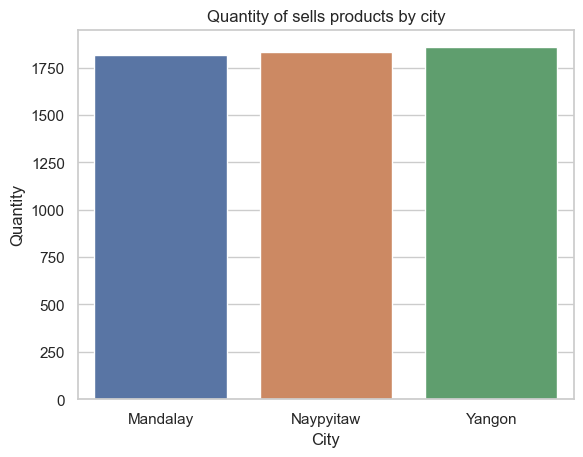

In [36]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(8, 5))
sns.barplot(data=df_ventas_by_product_and_city, 
                # x="Product line", 
                x="City", 
                y="Quantity",
                estimator="sum",
                errorbar=None
                # hue="Product line",
                # hue="City",
                )#.get_legend().remove()
# legend=plt.gca().get_legend()
# plt.legend(loc="upper right", bbox_to_anchor=(1,0.5))
plt.title("Quantity of sells products by city")

Text(0.5, 1.0, 'Revenue by city')

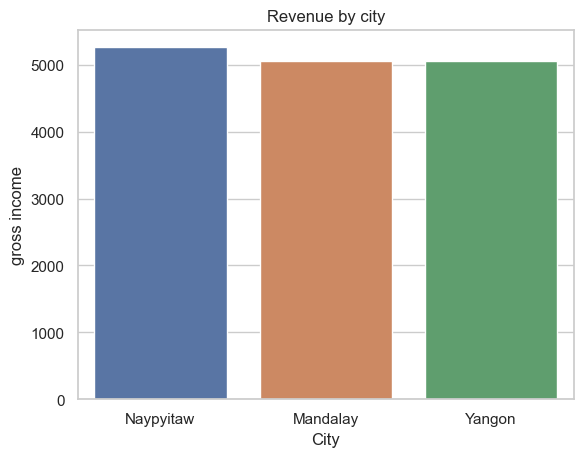

In [37]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(8, 5))
sns.barplot(data=df_data_ventas, 
                # x="Product line", 
                x="City", 
                y="gross income",
                estimator="sum",
                # hue="Product line",
                errorbar=None
                # hue="City",
                )#.get_legend().remove()
# legend=plt.gca().get_legend()
# plt.legend(loc="upper right", bbox_to_anchor=(1,0.5))
plt.title("Revenue by city")

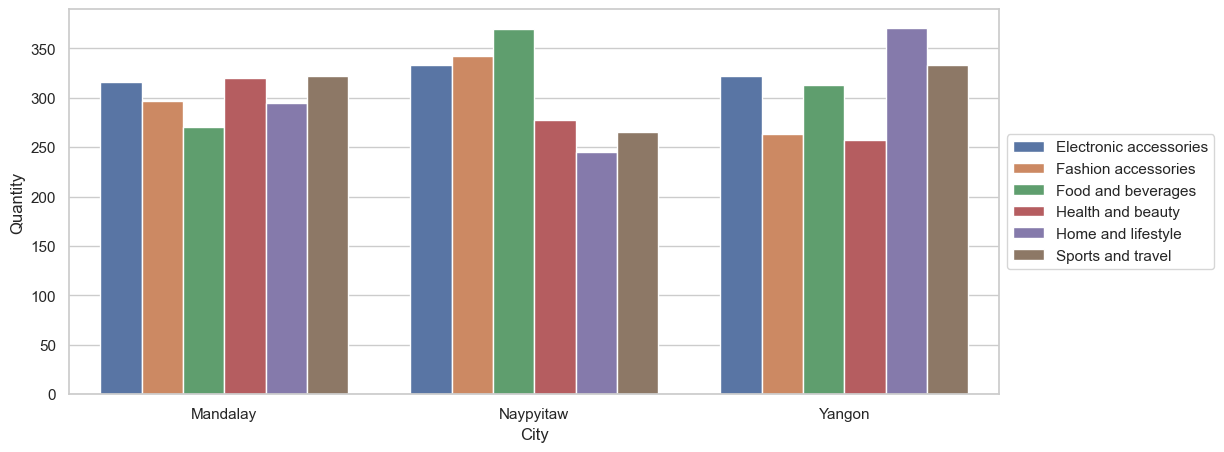

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.barplot(data=df_ventas_by_product_and_city, 
                # x="Product line", 
                x="City", 
                y="Quantity",
                hue="Product line",
                estimator="sum",
                #hue="City",
                )#.get_legend().remove()
legend=plt.gca().get_legend()
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

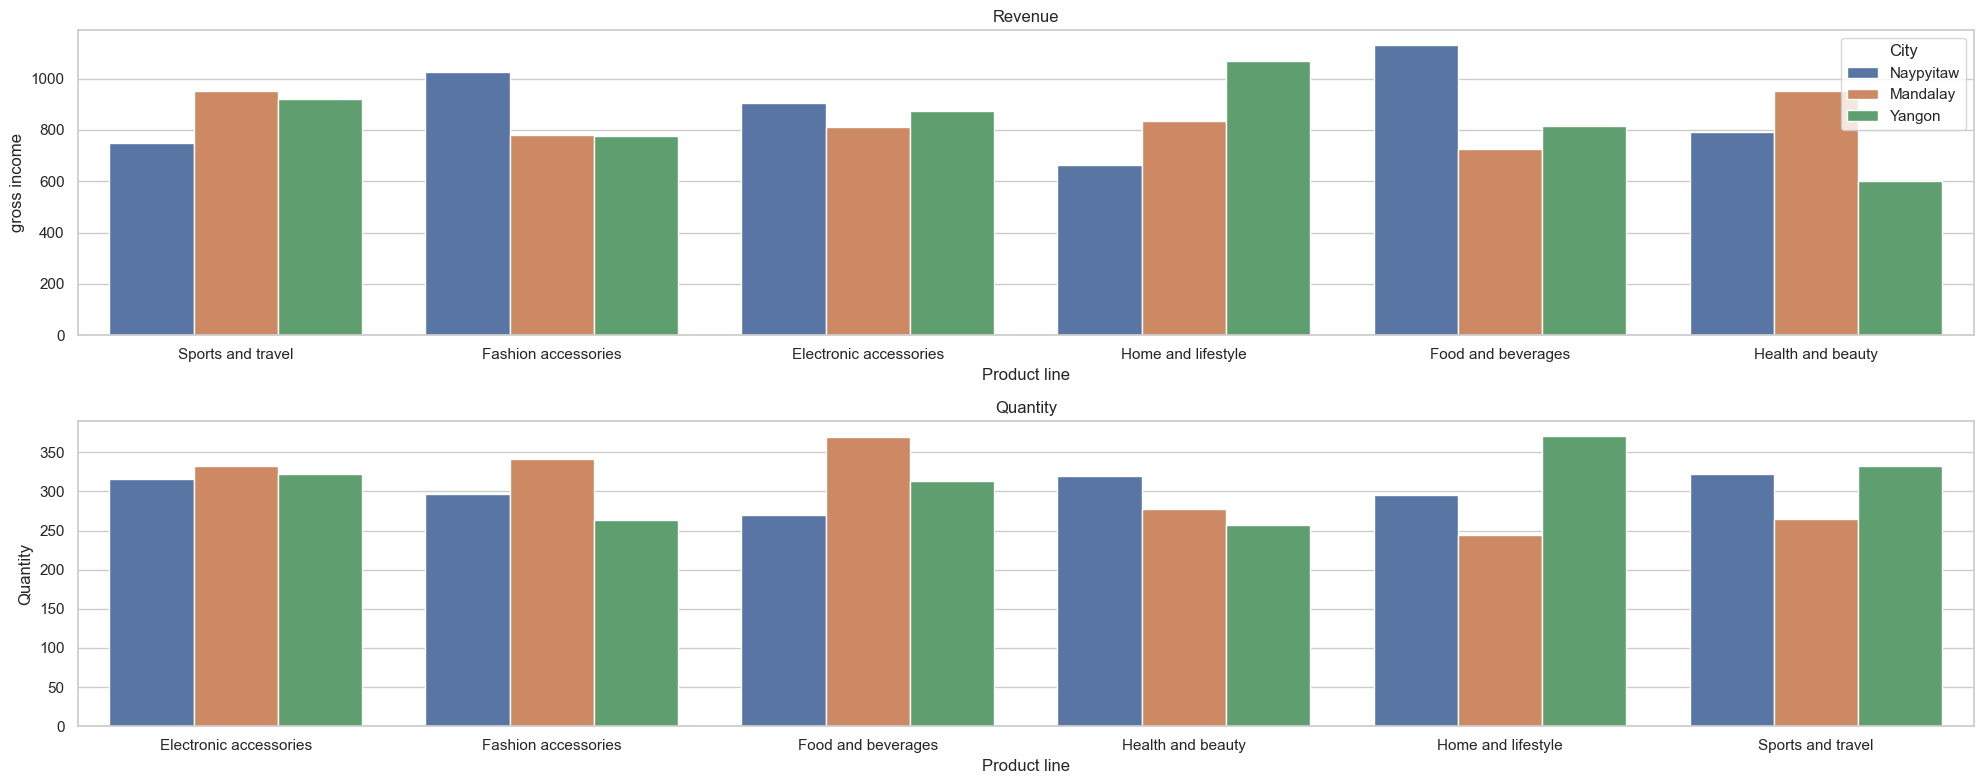

In [39]:
fig, axes = plt.subplots(2,1, figsize=(20,8))
sns.set(style="whitegrid")
sns.barplot(data=df_data_ventas, 
                x="Product line", 
                #x="City", 
                y="gross income",
                #hue="Product line",
                estimator="sum",
                hue="City",
                ax=axes[0],
                errorbar=None,
                )
axes[0].set_title("Revenue")
sns.barplot(data=df_ventas_by_product_and_city, 
                x="Product line", 
                #x="City", 
                y="Quantity",
                #hue="Product line",
                estimator="sum",
                hue="City",
                ax=axes[1]
                ).get_legend().remove()
axes[1].set_title("Quantity")
plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

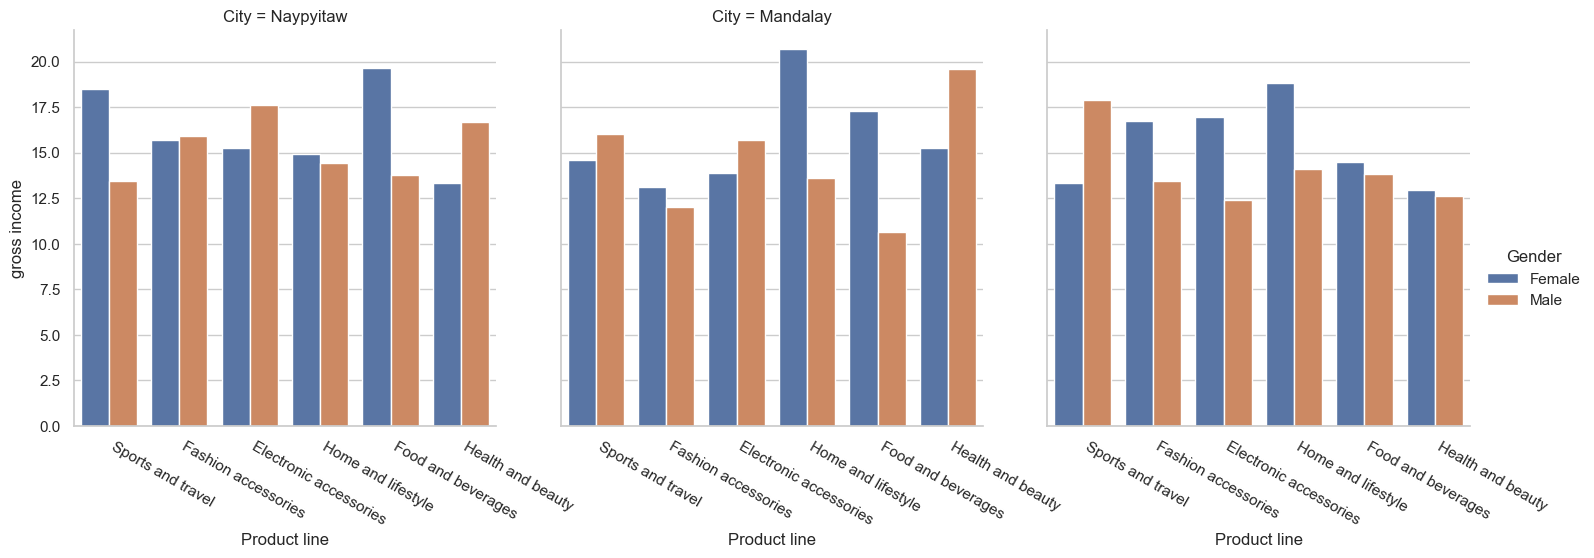

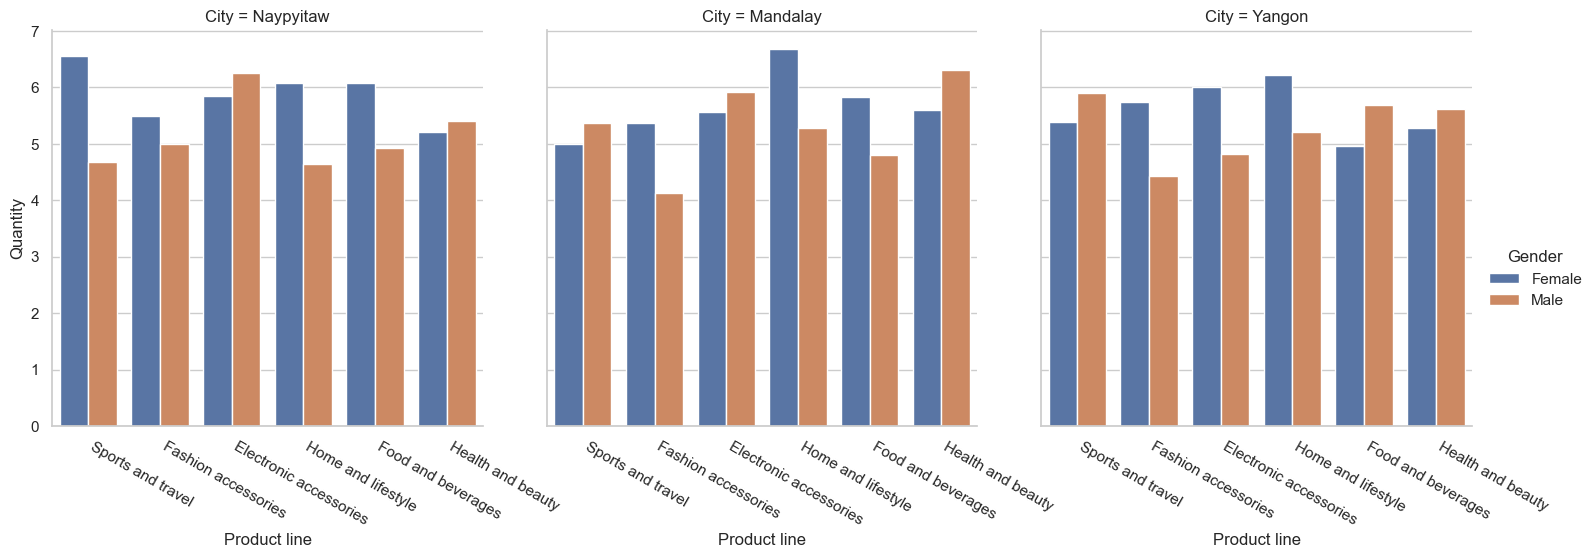

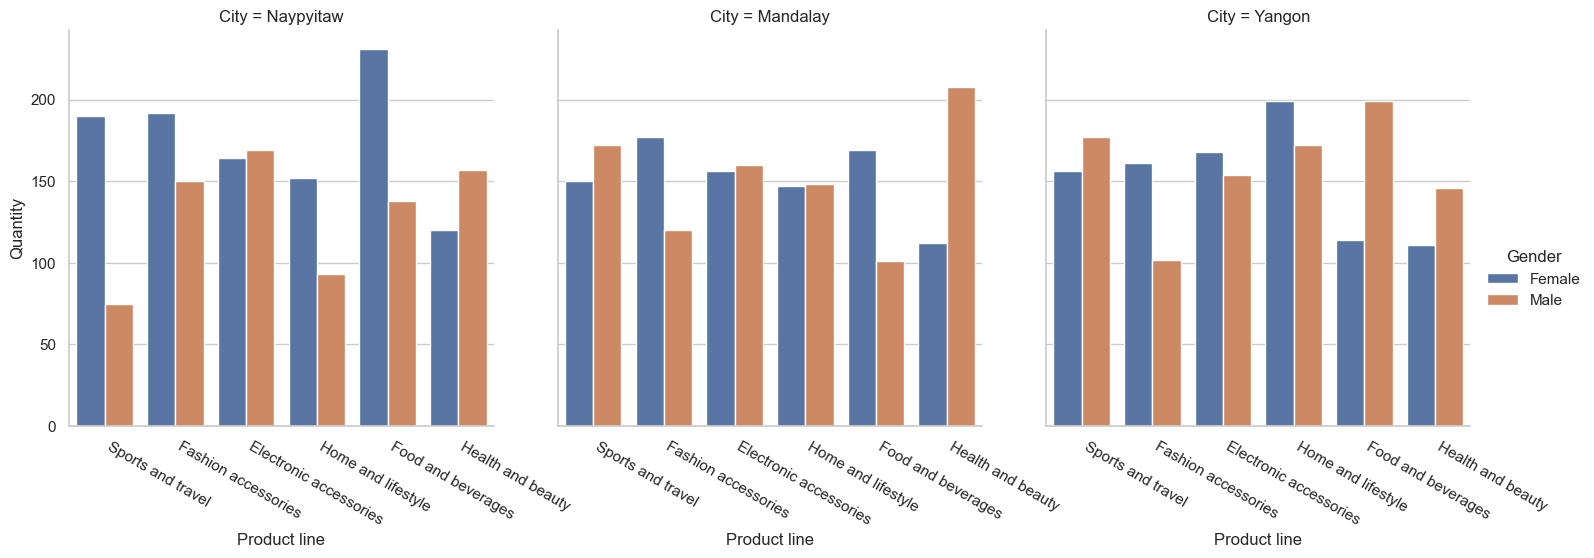

In [40]:
plt.figure(figsize=(16,10))
g = sns.catplot(data = df_data_ventas,
 x = 'Product line',
 y = 'gross income',
 hue = 'Gender',
 col = 'City',
 kind = 'bar',
 errorbar= None)
g.set_xticklabels(rotation=-30,horizontalalignment='left')
plt.title("")


t=sns.catplot(data = df_data_ventas,
 x = 'Product line',
 y = 'Quantity',
 hue = 'Gender',
 col = 'City',
 kind = 'bar',
 errorbar= None)
t.set_xticklabels(rotation=-30,horizontalalignment='left')

t=sns.catplot(data = df_data_ventas,
 x = 'Product line',
 y = 'Quantity',
 hue = 'Gender',
 col = 'City',
 kind = 'bar',
 estimator= "sum",
 errorbar= None)
t.set_xticklabels(rotation=-30,horizontalalignment='left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Revenue by city')

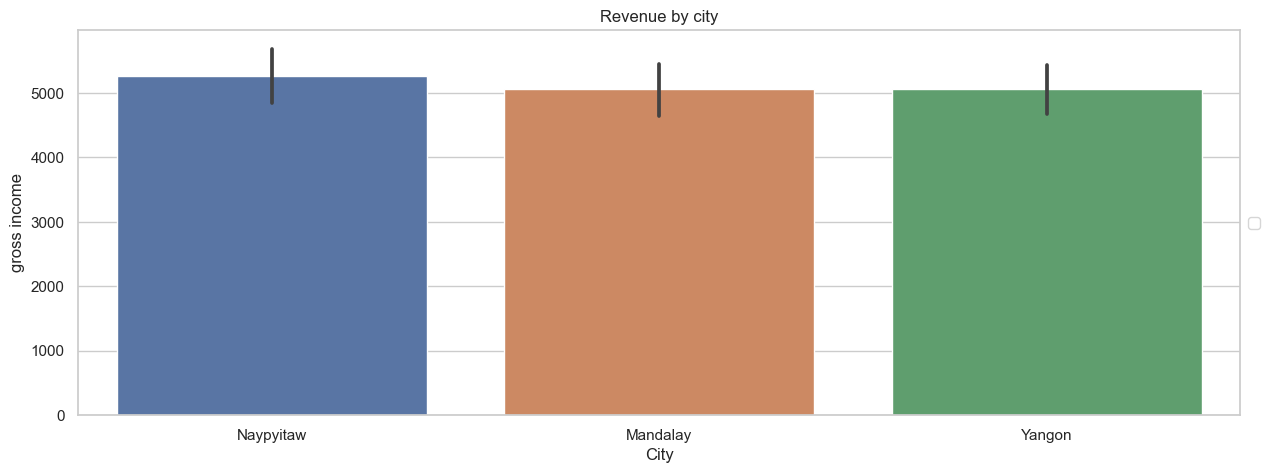

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.barplot(data=df_data_ventas, 
                # x="Product line", 
                x="City", 
                y="gross income",
                #hue="Product line",
                estimator="sum",
                # hue="City",
                )#.get_legend().remove()
legend=plt.gca().get_legend()
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.title("Revenue by city")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


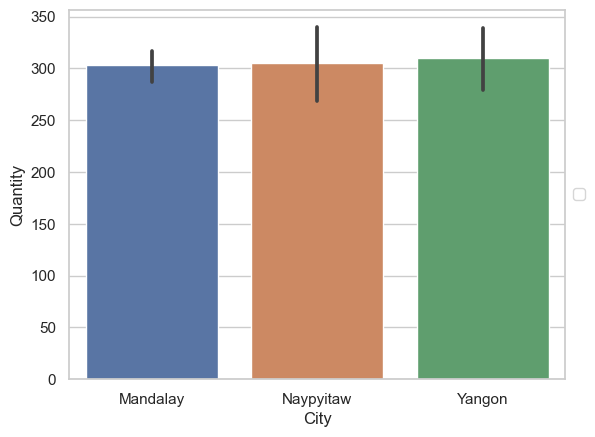

In [42]:
sns.set(style="whitegrid")
# plt.figure(figsize=(8, 5))
sns.barplot(data=df_ventas_by_product_and_city, 
                # x="Product line", 
                x="City", 
                y="Quantity",
                # hue="City",
                )#.get_legend().remove()
legend=plt.gca().get_legend()
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

## Flujo de ventas de productos por mes?

In [43]:
product_line=df_data_ventas["Product line"].unique()
cities=df_data_ventas["City"].unique()
Quantities=df_data_ventas["Quantity"].unique()


In [44]:
df_ventas_by_product_and_city_by_month=df_data_ventas[["Quantity","Product line","City","month"]].groupby([
    "City",
    "Product line",
    "month",
    ]).sum().reset_index()
df_ventas_by_product_and_city_by_month

,City,Product line,month,Quantity
0,Mandalay,Electronic accessories,1,119
1,Mandalay,Electronic accessories,2,118
2,Mandalay,Electronic accessories,3,79
3,Mandalay,Fashion accessories,1,103
4,Mandalay,Fashion accessories,2,118
5,Mandalay,Fashion accessories,3,76
6,Mandalay,Food and beverages,1,102
7,Mandalay,Food and beverages,2,107
8,Mandalay,Food and beverages,3,61
9,Mandalay,Health and beauty,1,91


<function matplotlib.pyplot.show(close=None, block=None)>

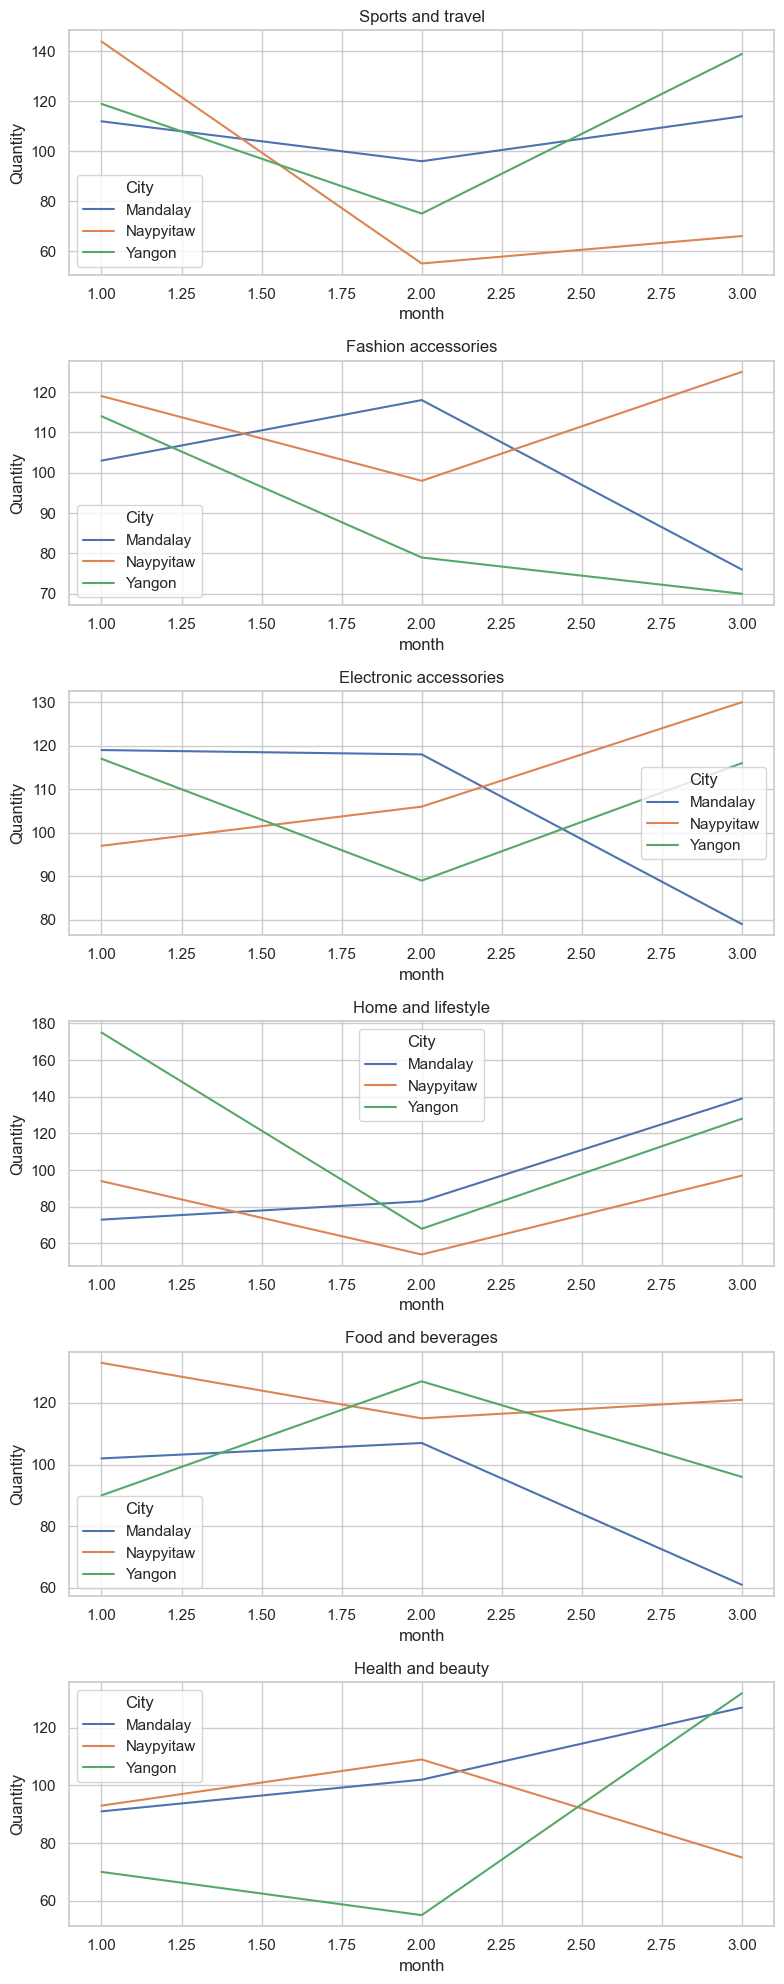

In [45]:
fig, axes = plt.subplots(len(product_line),1, figsize=(8,20))

for n in range(len(product_line)):
    product_num= n
    mask= df_ventas_by_product_and_city_by_month["Product line"]==product_line[product_num]
    sns.lineplot(data=df_ventas_by_product_and_city_by_month[mask], 
                    # x="Product line", 
                    x="month", 
                    y='Quantity',
                    hue="City",
                    ax=axes[product_num],
                    sort=False,
                    dashes=False,
                    # hue="City",
                    # legend=False,
                    # label=product_line[product_num],
                    )
    # .set_title(product_line[product_num])
    # axes[n].get_legend().remove()
    axes[n].set_title(product_line[product_num])
# plt.title(f"{product_line[product_num]}")
plt.tight_layout()
# fig.legend(df_ventas_by_product_and_city_by_month.City.unique())
plt.show

## Flujo de ventas de productos por dia de la semana?

<function matplotlib.pyplot.show(close=None, block=None)>

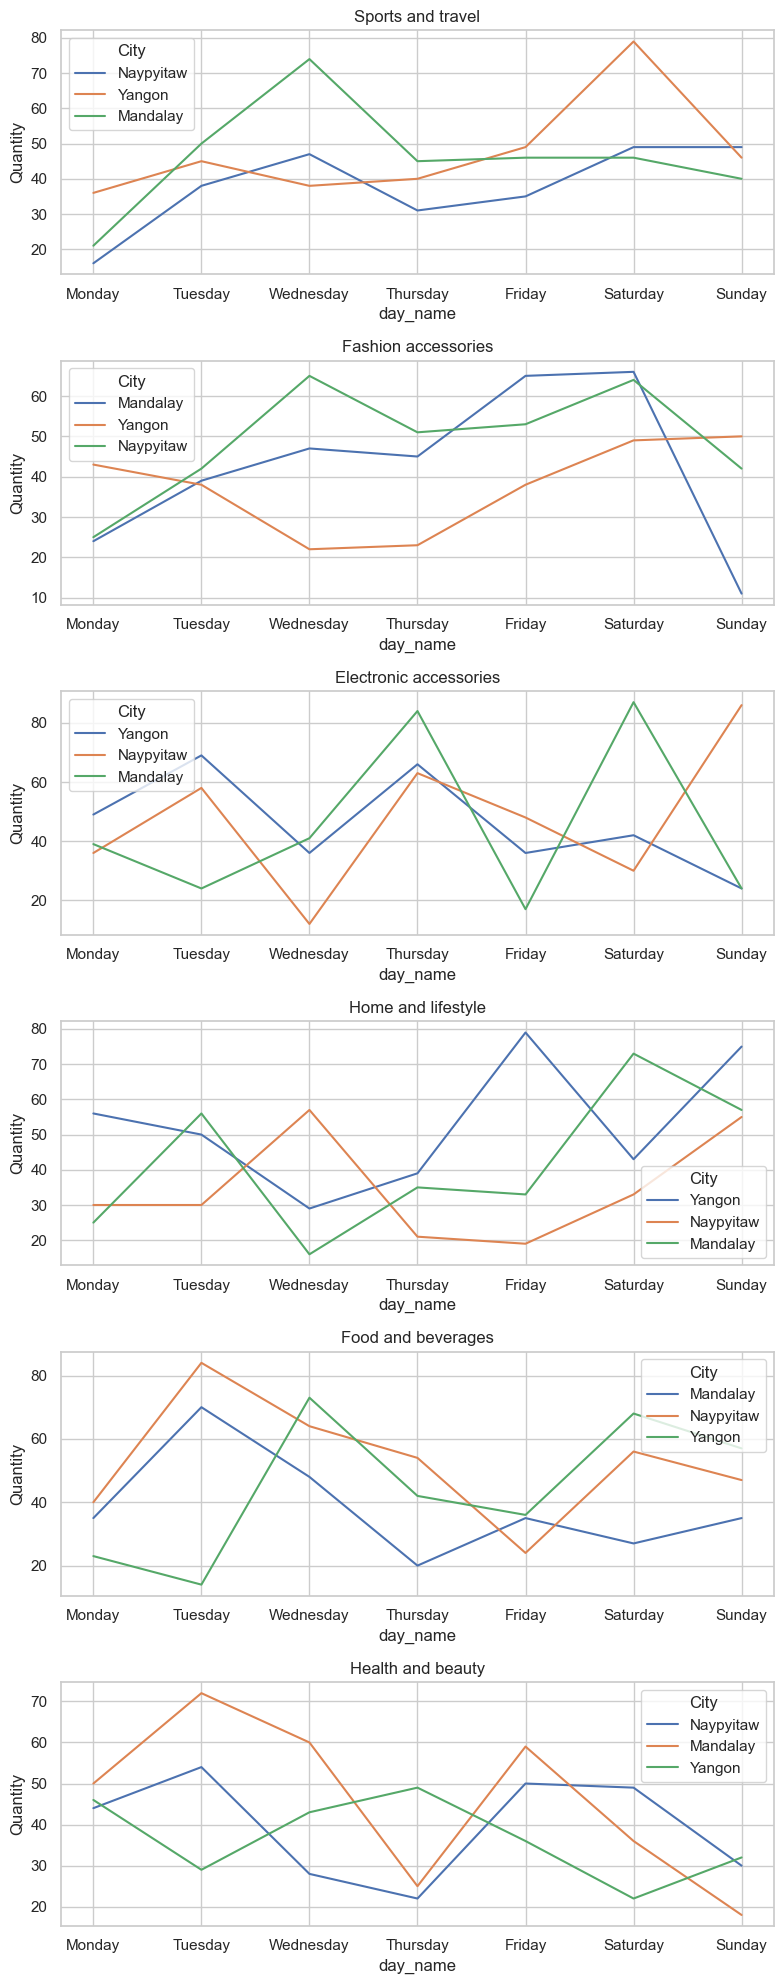

In [46]:
fig, axes = plt.subplots(len(product_line),1, figsize=(8,20))

for n in range(len(product_line)):
    product_num= n
    mask= df_data_ventas["Product line"]==product_line[product_num]
    sns.lineplot(data=df_data_ventas[mask], 
                    # x="Product line", 
                    x="day_name", 
                    y='Quantity',
                    hue="City",
                    ax=axes[product_num],
                    estimator="sum",
                    errorbar=None,
                    # hue_order=df_data_ventas["City"].unique(),
                    # hue="City",
                    # legend=False,
                    # label=product_line[product_num],
                    )
    # .set_title(product_line[product_num])
    # axes[n].get_legend().remove()
    axes[n].set_title(product_line[product_num])
# plt.title(f"{product_line[product_num]}")
plt.tight_layout()
# fig.legend(df_data_ventas.City.unique())
plt.show

## Flujo de ventas de productos por hora del día?

In [47]:
df_data_ventas.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'day_name',
       'day_of_week', 'month', 'Operations'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

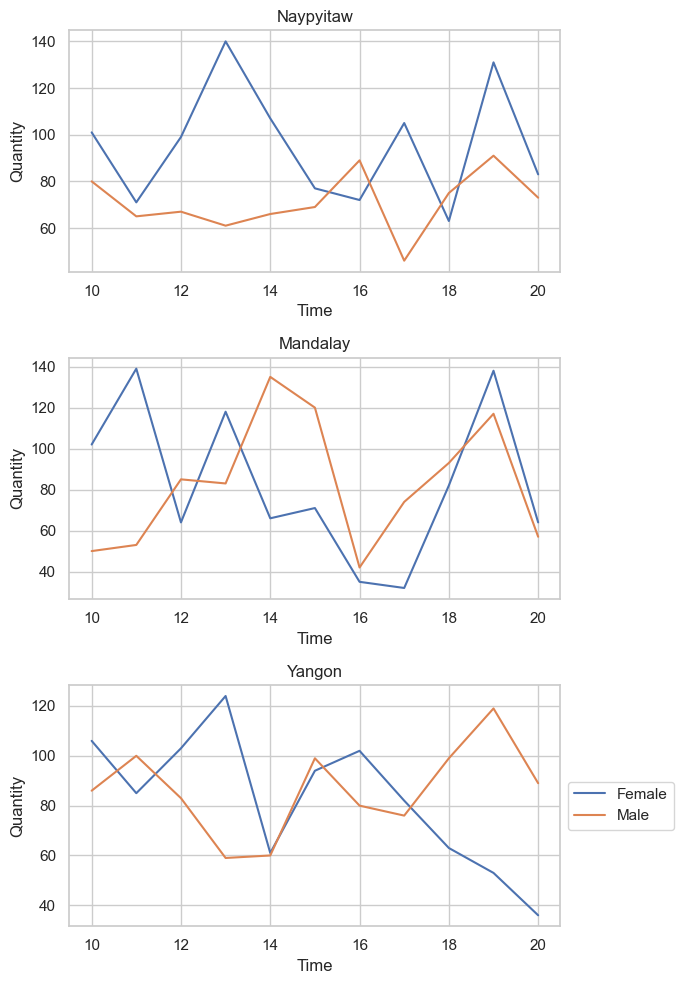

In [56]:
filter=cities
fig, axes = plt.subplots(len(filter),1,figsize=(7,10))

for n in range(len(filter)):
    product_num= n
    mask= df_data_ventas["City"]==filter[product_num]
    sns.lineplot(data=df_data_ventas[mask], 
                    # x="Product line", 
                    x="Time", 
                    y='Quantity',
                    hue="Gender",
                    hue_order=df_data_ventas["Gender"].unique(),
                    # hue="City",
                    ax=axes[product_num],
                    estimator="sum",
                    errorbar=None,
                    # hue="City",
                    # legend=False,
                    # label=filter[product_num],
                    )
    # .set_title(filter[product_num])
    axes[n].get_legend().remove()
    axes[n].set_title(filter[product_num])
# plt.title(f"{filter[product_num]}")
legend=plt.gca().get_legend()
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.tight_layout()
# fig.legend(df_data_ventas.City.unique())
plt.show

## payment method

<function matplotlib.pyplot.show(close=None, block=None)>

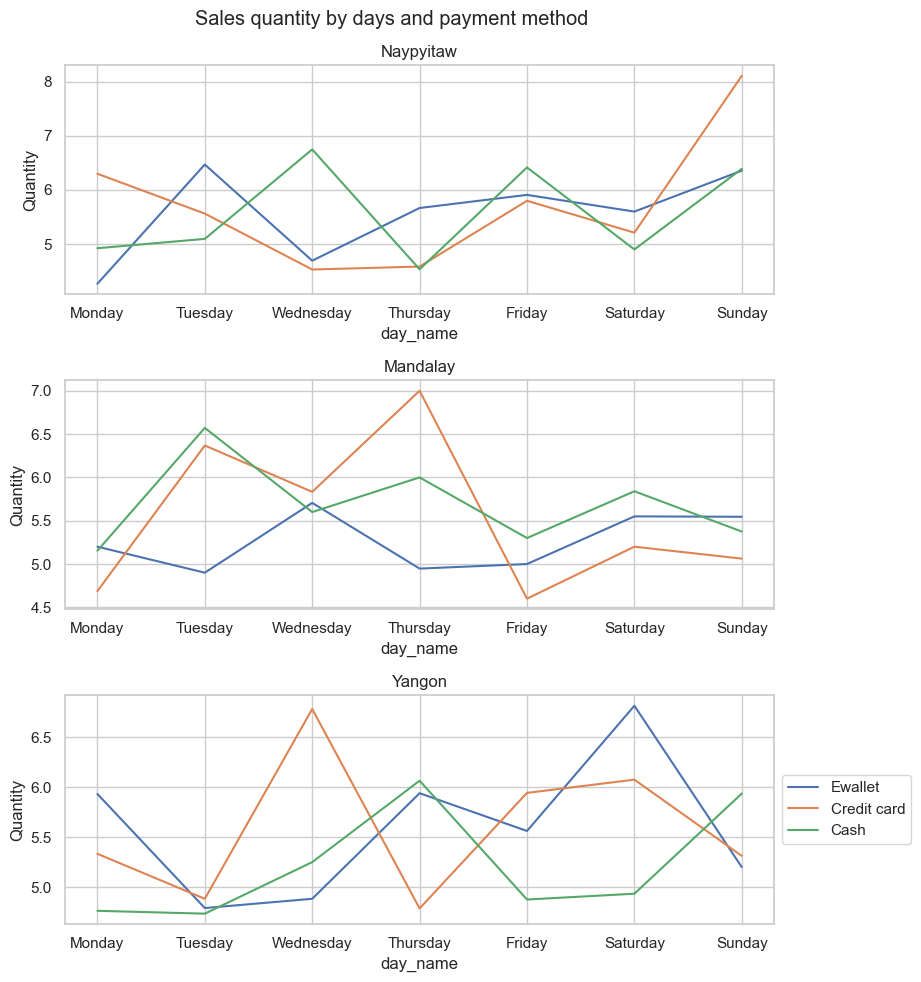

In [92]:
fig, axes = plt.subplots(len(product_line),1, figsize=(8,10))
product_line=cities
for n in range(len(product_line)):
    product_num= n
    mask= df_data_ventas["City"]==product_line[product_num]
    sns.lineplot(data=df_data_ventas[mask], 
                    # x="Product line", 
                    x="day_name", 
                    y='Quantity',
                    hue="Payment",
                    ax=axes[product_num],
                    estimator="mean",
                    hue_order=df_data_ventas["Payment"].unique(),
                    errorbar=None,
                    # hue="City",
                    # legend=False,
                    # label=product_line[product_num],
                    )
    # .set_title(product_line[product_num])
    axes[n].get_legend().remove()
    axes[n].set_title(product_line[product_num])
fig.suptitle(f"Sales quantity by days and payment method")
plt.tight_layout()
legend=plt.gca().get_legend()
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
# fig.legend(df_data_ventas.City.unique())
plt.show

In [50]:
df_data_ventas['Rating_int']=df_data_ventas['Rating'].astype(int)
df_data_ventas[['City', 'Customer type', 'Gender', 'Product line',
       'Quantity', 'Time', 'Rating_int' ]].groupby(['City', 'Customer type', 'Gender', 'Product line',
       'Quantity', 'Time' ]).value_counts()

City      Customer type  Gender  Product line            Quantity  Time  Rating_int
Mandalay  Member         Female  Electronic accessories  1         19    6             1
                                                         3         12    6             1
                                                                   13    8             1
                                                                   19    4             1
                                                         4         11    6             1
                                                                                      ..
Yangon    Normal         Male    Sports and travel       8         19    9             1
                                                         9         12    6             1
                                                                   19    9             1
                                                         10        10    6             1
                          

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

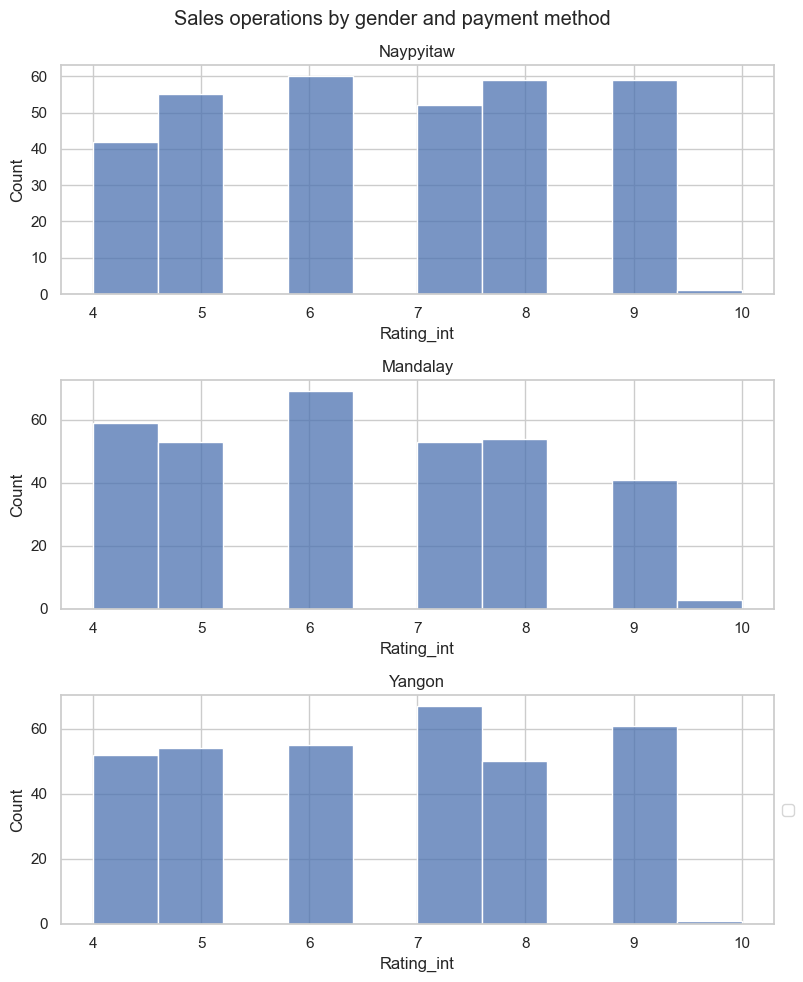

In [51]:
fig, axes = plt.subplots(len(product_line),1, figsize=(8,10))
product_line=cities
for n in range(len(product_line)):
    product_num= n
    mask= df_data_ventas["City"]==product_line[product_num]
    sns.histplot(data=df_data_ventas[mask], 
                    # x="Product line", 
                    x='Rating_int',
                    # x="Gender", 
                    #hue="Gender",
                    ax=axes[product_num],
                    # estimator="mode",
                    hue_order=df_data_ventas["Payment"].unique(),
                    # errorbar=None,
                    # hue="City",
                    # legend=False,
                    # label=product_line[product_num],
                    )
    # .set_title(product_line[product_num])
    # axes[n].get_legend().remove()
    axes[n].set_title(product_line[product_num])
fig.suptitle(f"Sales operations by gender and payment method")
plt.tight_layout()
legend=plt.gca().get_legend()
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
# fig.legend(df_data_ventas.City.unique())
plt.show

## type of costumer

<function matplotlib.pyplot.show(close=None, block=None)>

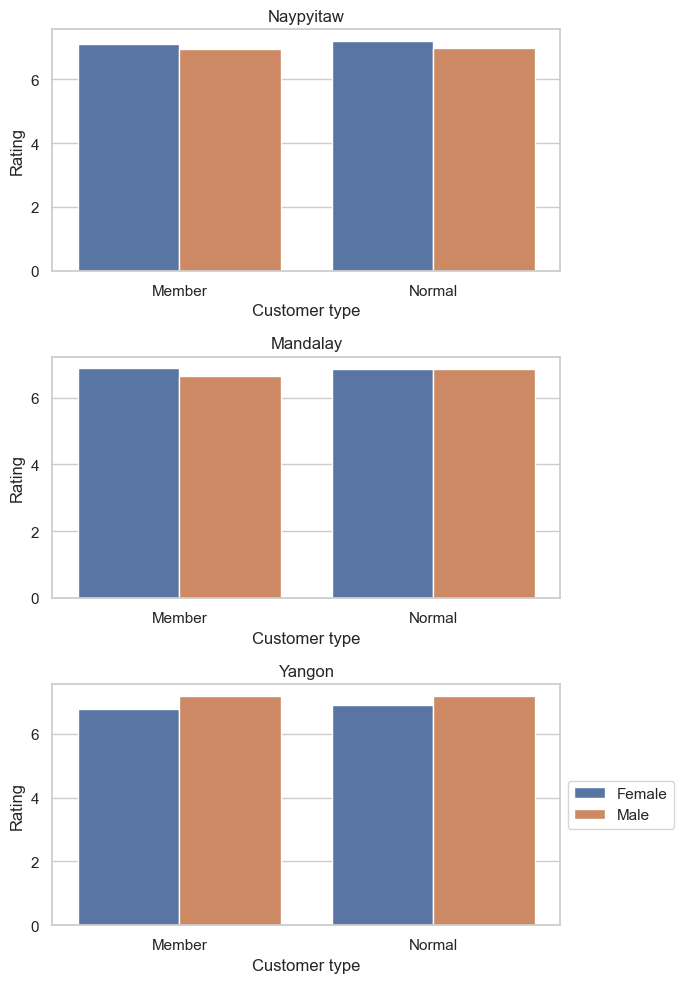

In [66]:
filter=cities
fig, axes = plt.subplots(len(filter),1,figsize=(7,10))

for n in range(len(filter)):
    product_num= n
    mask= df_data_ventas["City"]==filter[product_num]
    sns.barplot(data=df_data_ventas[mask], 
                    # x="Product line", 
                    x="Customer type",
                    hue="Gender", 
                    y='Rating',
                    hue_order=df_data_ventas["Gender"].unique(),
                    # hue="City",
                    ax=axes[product_num],
                    estimator="mean",
                    errorbar=None,
                    # hue="City",
                    # legend=False,
                    # label=filter[product_num],
                    )
    # .set_title(filter[product_num])
    axes[n].get_legend().remove()
    axes[n].set_title(filter[product_num])
# plt.title(f"{filter[product_num]}")
legend=plt.gca().get_legend()
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.tight_layout()
# fig.legend(df_data_ventas.City.unique())
plt.show

In [52]:
df_data_ventas.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'day_name',
       'day_of_week', 'month', 'Operations', 'Rating_int'],
      dtype='object')

## mas de tiempo

In [111]:
day=df_data_ventas.Date.iloc[1]-df_data_ventas.Date.iloc[0]
day.dt.day()

AttributeError: 'Timedelta' object has no attribute 'dt'

In [116]:
df_data_ventas["days_before"]=df_data_ventas.Date.diff()

In [118]:
df_data_ventas

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day_name,day_of_week,month,days_before,Operations
17,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10,Credit card,435.66,4.761905,21.783,6.9,Tuesday,1,1,NaT,1
245,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14,Cash,380.72,4.761905,19.036,5.7,Tuesday,1,1,0 days,1
450,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.413,470.673,2019-01-01,19,Cash,448.26,4.761905,22.413,6.7,Tuesday,1,1,0 days,1
484,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.49,388.29,2019-01-01,19,Credit card,369.8,4.761905,18.49,7.0,Tuesday,1,1,0 days,1
496,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,2019-01-01,15,Cash,126.44,4.761905,6.322,8.5,Tuesday,1,1,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,Mandalay,Member,Male,Food and beverages,93.4,2,9.34,196.14,2019-03-30,16,Cash,186.8,4.761905,9.34,5.5,Saturday,5,3,0 days,1
881,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12,Credit card,81.44,4.761905,4.072,9.5,Saturday,5,3,0 days,1
883,Yangon,Member,Female,Home and lifestyle,34.42,6,10.326,216.846,2019-03-30,12,Ewallet,206.52,4.761905,10.326,7.5,Saturday,5,3,0 days,1
937,Yangon,Normal,Female,Sports and travel,89.48,5,22.37,469.77,2019-03-30,10,Cash,447.4,4.761905,22.37,7.4,Saturday,5,3,0 days,1


<function matplotlib.pyplot.show(close=None, block=None)>

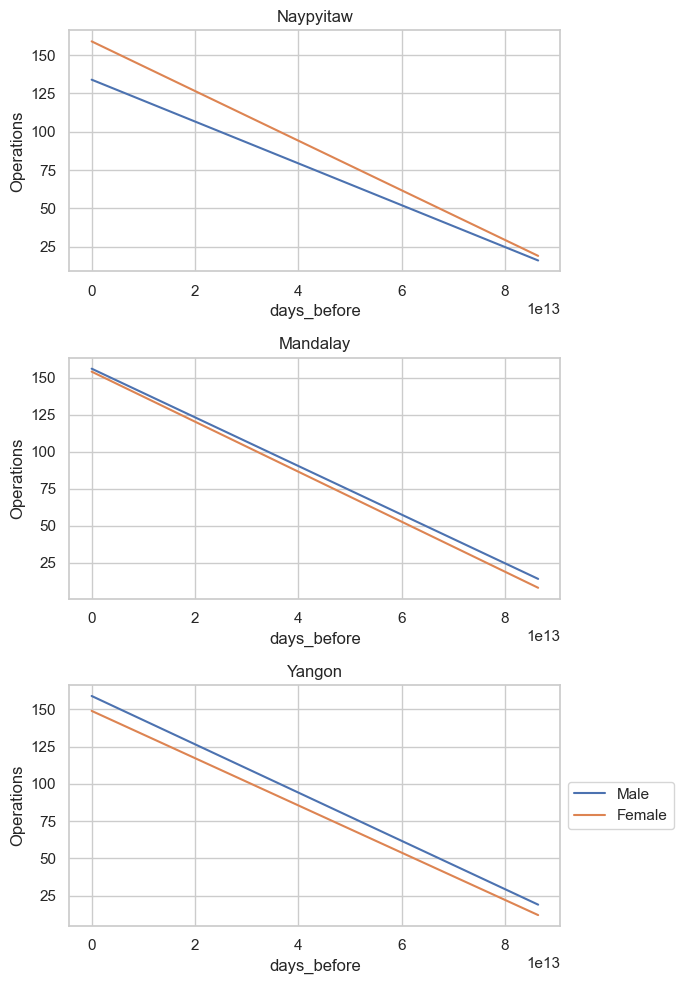

In [119]:
filter=cities
fig, axes = plt.subplots(len(filter),1,figsize=(7,10))

for n in range(len(filter)):
    product_num= n
    mask= df_data_ventas["City"]==filter[product_num]
    sns.lineplot(data=df_data_ventas[mask], 
                    # x="Product line", 
                    x="days_before",
                    hue="Gender", 
                    y='Operations',
                    hue_order=df_data_ventas["Gender"].unique(),
                    # hue="City",
                    ax=axes[product_num],
                    estimator="sum",
                    errorbar=None,
                    # hue="City",
                    # legend=False,
                    # label=filter[product_num],
                    )
    # .set_title(filter[product_num])
    axes[n].get_legend().remove()
    axes[n].set_title(filter[product_num])
# plt.title(f"{filter[product_num]}")
legend=plt.gca().get_legend()
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.tight_layout()
# fig.legend(df_data_ventas.City.unique())
plt.show

In [104]:
df_data_ventas.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'day_name',
       'day_of_week', 'month', 'days_before', 'Operations'],
      dtype='object')

## preguntas chat gpt

In [55]:
# Fecha de venta más común
fecha_mas_comun = df_data_ventas['Date'].value_counts().idxmax()

dia_mas_comun = df_data_ventas['day_name'].value_counts().idxmax()

# Hora de venta más común
hora_mas_comun = df_data_ventas['Time'].value_counts().idxmax()

fecha_mas_comun, hora_mas_comun, dia_mas_comun

(Timestamp('2019-02-07 00:00:00'), 19, 'Saturday')

In [97]:
mask= df_data_ventas["Quantity"]<2
df_data_ventas[mask].iloc[5]

City                                 Naypyitaw
Customer type                           Member
Gender                                    Male
Product line                Food and beverages
Unit price                               68.98
Quantity                                     1
Tax 5%                                   3.449
Total                                   72.429
Date                       2019-01-21 00:00:00
Time                                        20
Payment                                   Cash
cogs                                     68.98
gross margin percentage               4.761905
gross income                             3.449
Rating                                     4.8
day_name                                Monday
day_of_week                                  0
month                                        1
Operations                                   1
Rating_int                                   4
Name: 707, dtype: object

## tendencias

In [90]:
filter=cities
for n in range(len(filter)):
    product_num= n
    mask= (df_data_ventas["City"]==filter[product_num]) and (df_data_ventas["Quantity"]<=2)

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_data_ventas[mask], x='Date', y='Quantity', errorbar=None)
    plt.title(f'Tendencia de las ventas a lo largo del tiempo {filter[product_num]}')
    plt.xlabel('Fecha')
    plt.ylabel('Total de ventas')
    plt.xticks(rotation=45)
    plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

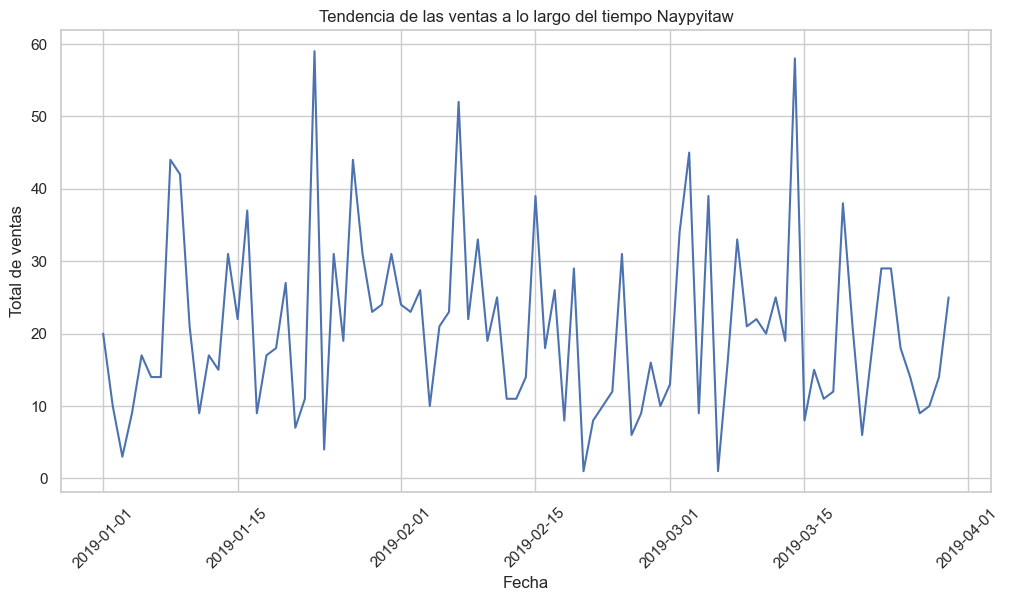

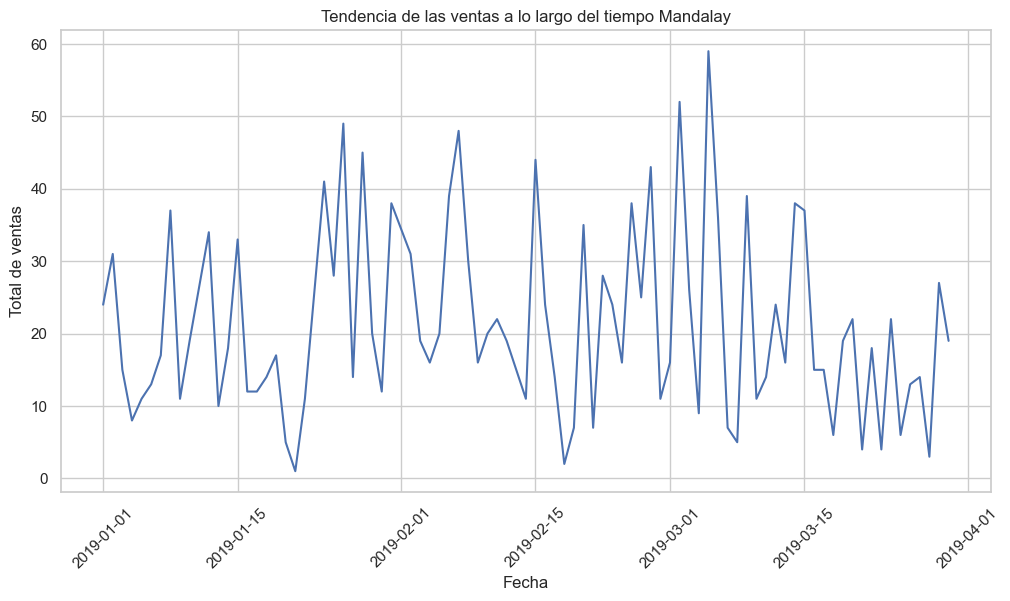

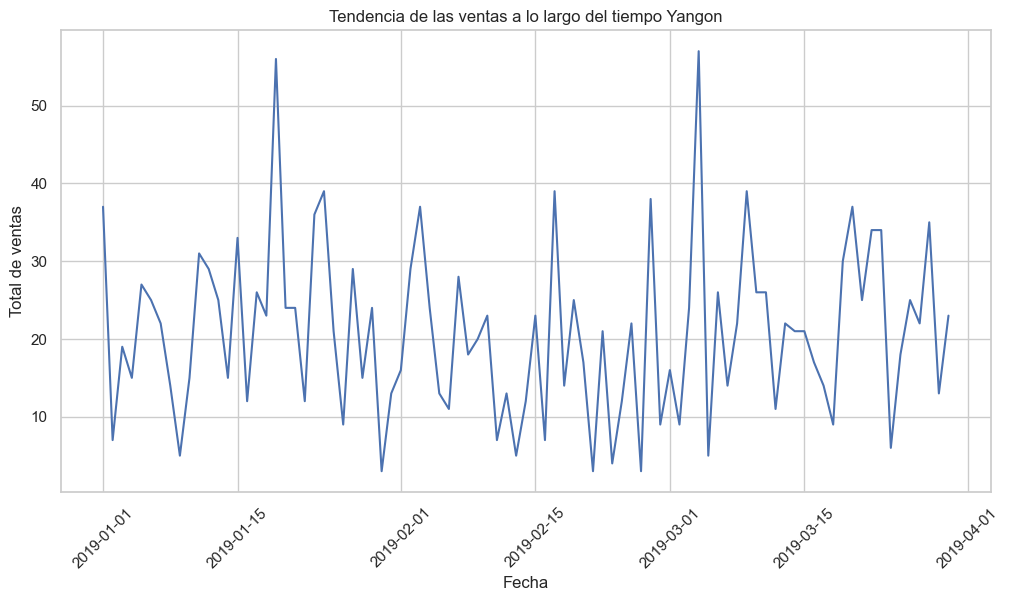

In [93]:
# Grafica la tendencia de las ventas a lo largo del tiempo

filter=cities
for n in range(len(filter)):
    product_num= n
    mask= df_data_ventas["City"]==filter[product_num]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_data_ventas[mask], estimator="sum", x='Date', y='Quantity', errorbar=None)
    plt.title(f'Tendencia de las ventas a lo largo del tiempo {filter[product_num]}')
    plt.xlabel('Fecha')
    plt.ylabel('Total de ventas')
    plt.xticks(rotation=45)
    plt.show()


## informacion extra de los datos

Gross income = ingreso bruto = ingreso monetario antes de deducir del mismo gastos e impuestos.

Cogs = cost of goods sold = costo de bienes vendidos = es el valor del costo directo del producto o servicio vendido durante un perioso determinado, El COGS incluye el costo de materias primas, mano de obra directa y cualquier otro gasto directamente atribuible a la producción de los productos o servicios vendidos. En resumen, el COGS representa los costos incurridos para producir los bienes o servicios que se han vendido.

Información de atributos

Id. de factura: número de identificación de factura de comprobante de venta generado por computadora.

Sucursal: Sucursal de supercentros (se dispone de 3 sucursales identificadas por A, B y C).

Ciudad: Ubicación de los supercentros.

Tipo de cliente: Member y Normal.

Género: Tipo de género del cliente

Línea de productos: Grupos generales de categorización de artículos: accesorios electrónicos, accesorios de moda, alimentos y bebidas, salud y belleza, hogar y estilo de vida, deportes y viajes

Precio unitario: Precio de cada producto en $

Cantidad: Número de productos comprados por el cliente

Impuesto: 5% de tasa de impuestos por compra del cliente

Total: Precio total impuestos incluidos

Fecha: Fecha de compra (Registro disponible desde enero 2019 hasta marzo 2019)

Hora: Hora de compra (10am a 9pm)

Pago: pago utilizado por el cliente para la compra (hay 3 métodos disponibles: efectivo, tarjeta de crédito y billetera electrónica)

COGS: costo de los bienes vendidos

Porcentaje de margen bruto: Porcentaje de margen bruto

Ingreso bruto: Ingreso bruto

Calificación: calificación de estratificación del cliente en su experiencia de compra general (en una escala del 1 al 10)